# World Happiness Report Visualization

The World Happiness Report is a measure of the state of global happiness based on various quality of life factors. Results from these are used to inform multiple governments and organizations of policy-making decisions, as well as aid experts in the assessment of a nation's progress. For this notebook, we will be exploring some trends from 2015 to 2019, as well as visualize the correlations in the 2019 dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# import data
df_2015 = pd.read_csv('data/2015.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')
df_2018 = pd.read_csv('data/2018.csv')
df_2019 = pd.read_csv('data/2019.csv')

## Data Cleaning

In [2]:
# drop NA values
df_2015.dropna(inplace = True)
df_2016.dropna(inplace = True)
df_2017.dropna(inplace = True)
df_2018.dropna(inplace = True)
df_2019.dropna(inplace = True)

In [3]:
# rename columns

column_names = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Government Trust']

df_2015.columns.values[[0, 2, 3, 5, 6, 7, 8, 10, 9]] = column_names
df_2016.columns.values[[0, 2, 3, 6, 7, 8, 9, 11, 10]] = column_names
df_2017.columns.values[[0, 1, 2, 5, 6, 7, 8, 9, 10]] = column_names
df_2018.columns.values[[1, 0, 2, 3, 4, 5, 6, 7, 8]] = column_names
df_2019.columns.values[[1, 0, 2, 3, 4, 5, 6, 7, 8]] = column_names


In [4]:
# determine which countries do not have information on regions
unique_countries = pd.concat([df_2015['Country'], df_2016['Country'], df_2017['Country'], df_2018['Country'], df_2019['Country']]).unique()
countries_with_region = pd.concat([df_2015['Country'], df_2016['Country']])
region = pd.concat([df_2015['Region'], df_2016['Region']])
missing_countries = [country for country in unique_countries if country not in countries_with_region.unique()]

print (f'Countries with No Mapped Region: {missing_countries}')

Countries with No Mapped Region: ['Taiwan Province of China', 'Hong Kong S.A.R., China', 'Trinidad & Tobago', 'Northern Cyprus', 'North Macedonia', 'Gambia']


In [5]:
#set country to region map
country_region_map = dict(zip(countries_with_region, region))
country_region_map['Taiwan Province of China'] = 'Eastern Asia'
country_region_map['Hong Kong S.A.R., China'] = 'Eastern Asia'
country_region_map['Trinidad & Tobago'] = 'Latin America and Caribbean'
country_region_map['Northern Cyprus'] = 'Middle East and Northern Africa'
country_region_map['North Macedonia'] ='Central and Eastern Europe'
country_region_map['Gambia'] = 'Sub-Saharan Africa'

# add region column to 2017 - 2019 datasets
df_2017['Region'] = df_2017['Country'].map(country_region_map)
df_2018['Region'] = df_2018['Country'].map(country_region_map)
df_2019['Region'] = df_2019['Country'].map(country_region_map)

column_names.append('Region')

In [6]:
# add year column
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
column_names.append('Year')

# compile dataframes
df = pd.concat([df_2015[column_names], df_2016[column_names], df_2017[column_names], df_2018[column_names], df_2019[column_names]])

## Data Visualization

### Historical Data

We will be getting the Top 5 and Bottom 5 countries based on the 2019 data and look at their trends for the last 5 years.

In [7]:
top_5_countries = df_2019['Country'][df_2019['Happiness Rank'] < 6].unique()
mask_top_5 = df.Country.isin(top_5_countries)
historical_top_5 = df[mask_top_5].pivot('Year' , 'Country', 'Happiness Score').dropna(axis=1)

historical_top_5

Country,Denmark,Finland,Iceland,Netherlands,Norway
Year,,,,,
2015,7.527,7.406,7.561,7.378,7.522
2016,7.526,7.413,7.501,7.339,7.498
2017,7.522,7.469,7.504,7.377,7.537
2018,7.555,7.632,7.495,7.441,7.594
2019,7.600,7.769,7.494,7.488,7.554


In [8]:
bottom_5_countries = df_2019['Country'][df_2019['Happiness Rank'] > (df_2019['Happiness Rank'].max() - 7)].unique()
mask_bottom_5 = df.Country.isin(bottom_5_countries)
historical_bottom_5 = df[mask_bottom_5].pivot('Year' , 'Country', 'Happiness Score').dropna(axis=1)
historical_bottom_5

Country,Afghanistan,Malawi,Rwanda,Tanzania,Yemen
Year,,,,,
2015,3.575,4.292,3.465,3.781,4.077
2016,3.360,4.156,3.515,3.666,3.724
2017,3.794,3.970,3.471,3.349,3.593
2018,3.632,3.587,3.408,3.303,3.355
2019,3.203,3.410,3.334,3.231,3.380


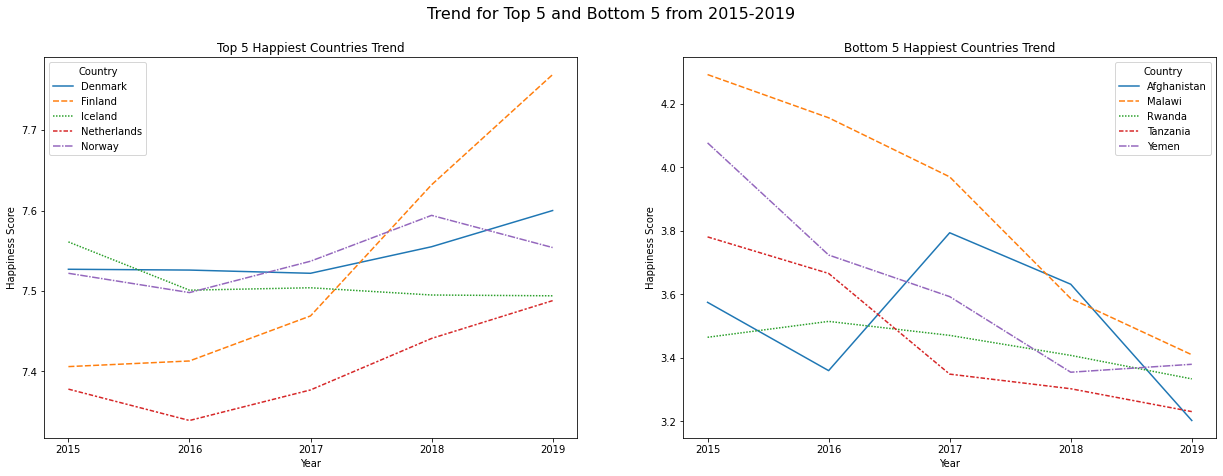

In [9]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(21, 7))
fig.suptitle('Trend for Top 5 and Bottom 5 from 2015-2019', fontsize=16)


sns.lineplot(ax = axes[0], data = historical_top_5)
axes[0].set_title('Top 5 Happiest Countries Trend')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Happiness Score')


sns.lineplot(ax = axes[1], data = historical_bottom_5)
axes[1].set_title('Bottom 5 Happiest Countries Trend')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Happiness Score')

plt.xticks(df['Year'].unique())

plt.show()

### 2019 Data

#### Hapiness Score by Region

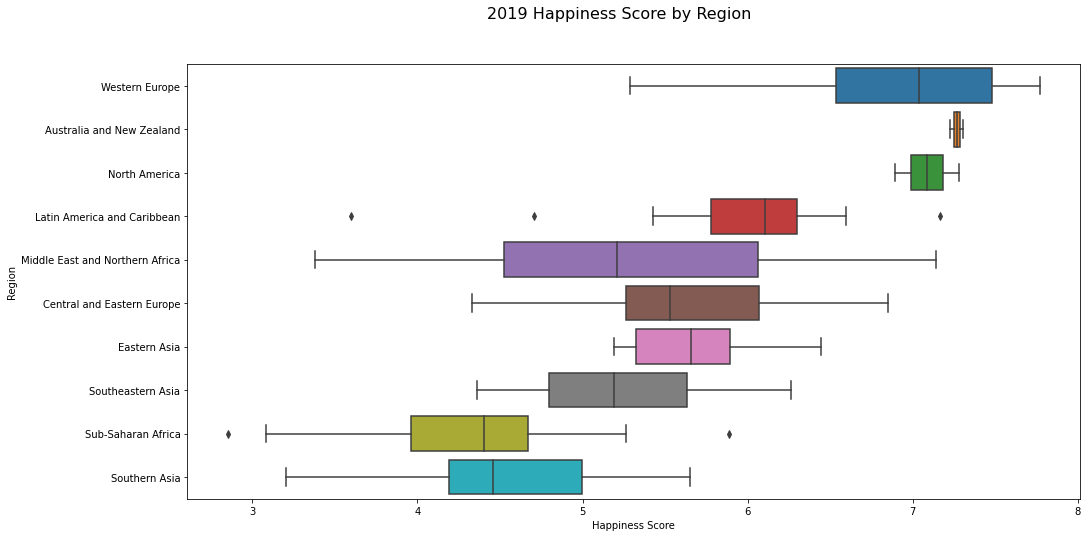

In [10]:
# fig, axes = plt.subplots(5, 1, figsize=(20, 60))

# sns.boxplot(ax= axes[0], x='Happiness Score', y='Region', data = df_2015)
# sns.boxplot(ax= axes[1], x='Happiness Score', y='Region', data = df_2016)
# sns.boxplot(ax= axes[2], x='Happiness Score', y='Region', data = df_2017)
# sns.boxplot(ax= axes[3], x='Happiness Score', y='Region', data = df_2018)
# sns.boxplot(ax= axes[4], x='Happiness Score', y='Region', data = df_2019)

plt.figure(figsize=(16, 8))
sns.boxplot(x='Happiness Score', y='Region', data = df_2019)
plt.suptitle('2019 Happiness Score by Region', fontsize=16)
plt.xlabel('Happiness Score')
plt.ylabel('Region')
plt.show()

#### Breakdown of Happiness Scores of the 2019 Top 5 and Bottom 5 Happiest Countries

In [11]:
# 2019 Top 5 data

happiness_variables = ['GDP per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Government Trust']
df_2019_top_5 = df_2019[df_2019.Country.isin(top_5_countries)].copy()
df_2019_top_5['dystopian-residual'] = df_2019_top_5['Happiness Score'] - df_2019_top_5.loc[:,happiness_variables].sum(axis = 1)
df_2019_top_5.drop(['Happiness Rank', 'Happiness Score', 'Region', 'Year'], axis= 1, inplace = True)
df_2019_top_5.set_index('Country', inplace = True)

df_2019_top_5

,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Government Trust,dystopian-residual
Country,,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393,2.714
Denmark,1.383,1.573,0.996,0.592,0.252,0.410,2.394
Norway,1.488,1.582,1.028,0.603,0.271,0.341,2.241
Iceland,1.380,1.624,1.026,0.591,0.354,0.118,2.401
Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,2.394


In [12]:
# 2019 bottom 5 data

df_2019_bottom_5 = df_2019[df_2019.Country.isin(bottom_5_countries)].copy()
df_2019_bottom_5['dystopian-residual'] = df_2019_bottom_5['Happiness Score'] - df_2019_bottom_5.loc[:,happiness_variables].sum(axis = 1)
df_2019_bottom_5.drop(['Happiness Rank', 'Happiness Score', 'Region', 'Year'], axis= 1, inplace = True)
df_2019_bottom_5.set_index('Country', inplace = True)
df_2019_bottom_5.drop(['Central African Republic', 'South Sudan'], axis= 0, inplace = True)

df_2019_bottom_5

,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Generosity,Government Trust,dystopian-residual
Country,,,,,,,
Malawi,0.191,0.560,0.495,0.443,0.218,0.089,1.414
Yemen,0.287,1.163,0.463,0.143,0.108,0.077,1.139
Rwanda,0.359,0.711,0.614,0.555,0.217,0.411,0.467
Tanzania,0.476,0.885,0.499,0.417,0.276,0.147,0.531
Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025,1.792


In [13]:
happiness_variables.append('dystopian-residual')

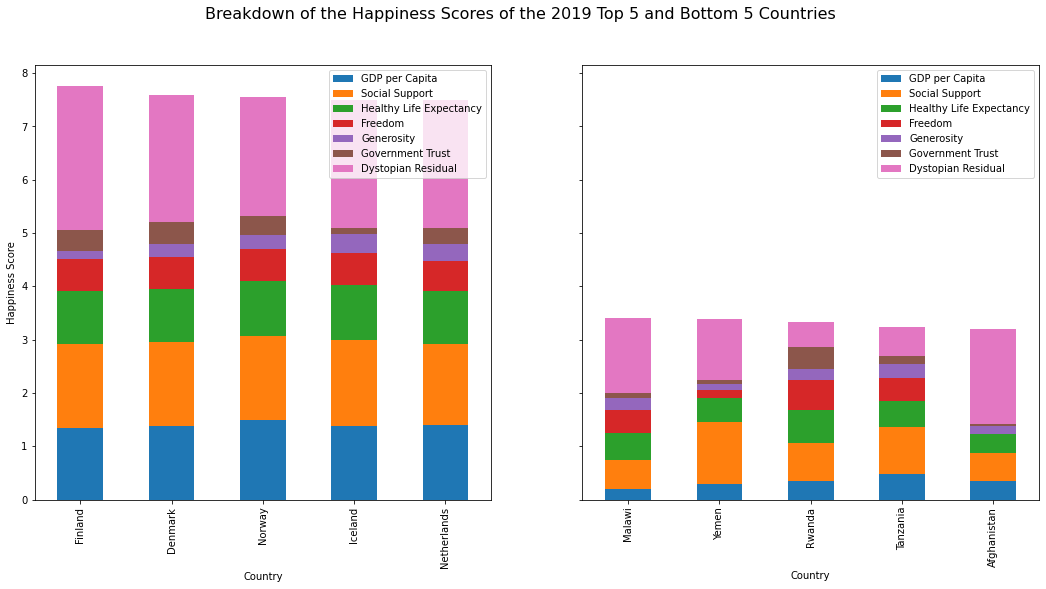

In [14]:
# Plot the stacked bar chart

fig1, axes1 = plt.subplots(1, 2, sharey = True, figsize =(18, 8))
fig1.suptitle('Breakdown of the Happiness Scores of the 2019 Top 5 and Bottom 5 Countries', fontsize = 16)

df_2019_top_5[happiness_variables].plot.bar(stacked = True, ax = axes1[0])
axes1[0].legend(['GDP per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Government Trust', 'Dystopian Residual'])
axes1[0].set_xlabel('Country')
axes1[0].set_ylabel('Happiness Score')


df_2019_bottom_5[happiness_variables].plot.bar(stacked = True, ax = axes1[1])
axes1[1].legend(['GDP per Capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Government Trust', 'Dystopian Residual'])
axes1[1].set_xlabel('Country')
axes1[1].set_ylabel('Happiness Score')

plt.show()

#### Overall Correlation of the Happiness Score and its Factors

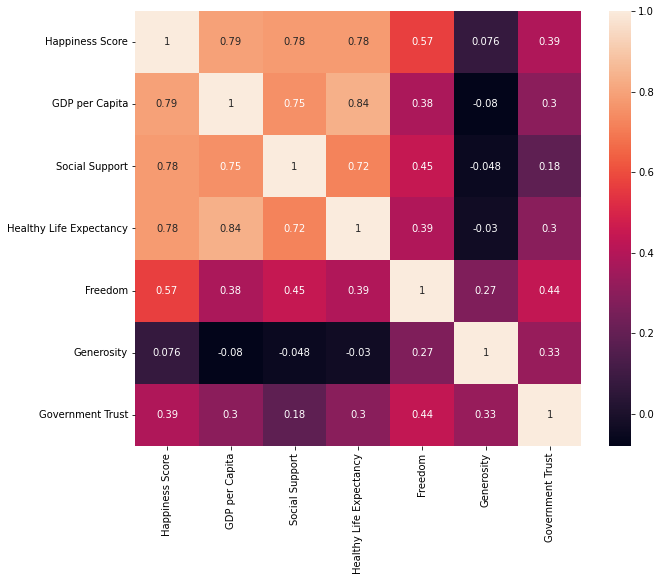

In [15]:
df_2019_corr = df_2019.iloc[:, 1:-1].corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_2019_corr, annot = True)
plt.show()


#### Check the trend of Healthy Life Expectancy versus Other Factors

In [16]:
df_2019_corr.sum(axis =1).sort_values(ascending = False)

Happiness Score            4.379002
Healthy Life Expectancy    3.990521
GDP per Capita             3.982587
Social Support             3.832079
Freedom                    3.492134
Government Trust           2.927096
Generosity                 1.514803
dtype: float64

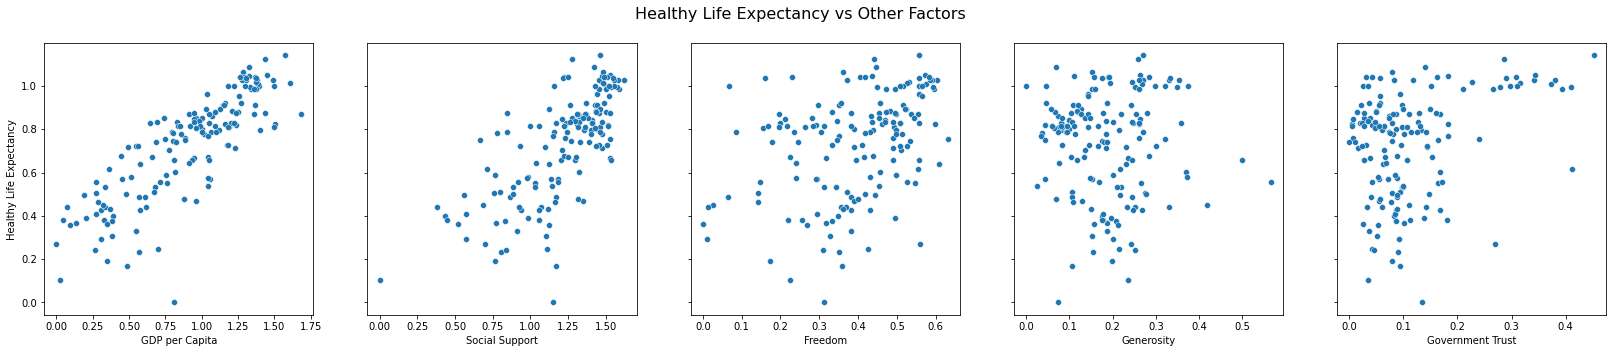

In [17]:
fig2, axes2 = plt.subplots(1, 5, sharey = True, figsize =(28,5))
fig2.suptitle('Healthy Life Expectancy vs Other Factors', fontsize = 16)
sns.scatterplot(x = 'GDP per Capita', y = 'Healthy Life Expectancy', data = df_2019, ax = axes2[0])
sns.scatterplot(x = 'Social Support', y = 'Healthy Life Expectancy', data = df_2019, ax = axes2[1])
sns.scatterplot(x = 'Freedom', y = 'Healthy Life Expectancy', data = df_2019, ax = axes2[2])
sns.scatterplot(x = 'Generosity', y = 'Healthy Life Expectancy', data = df_2019, ax = axes2[3])
sns.scatterplot(x = 'Government Trust', y = 'Healthy Life Expectancy', data = df_2019, ax = axes2[4])
plt.show()